## Датасет №1 (рейтинги плиток шоколада) 

Ссылка: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings

Проблемная область: качество шоколада и факторы, влияющие на его оценку потребителями.

Объекты наблюдения: плитки шоколада, каждая из которых имеет свои уникальные характеристики.

In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# вывод всех столбцов
df = pd.read_csv("..//..//static//csv//flavors_of_cacao.csv")
df.columns = df.columns.str.replace('\n', '')
print(df.columns)

Index(['Company (Maker-if known)', 'Specific Bean Originor Bar Name', 'REF',
       'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType',
       'Broad BeanOrigin'],
      dtype='object')


Атрибуты: 
* Company (Maker-if known) – название компании-производителя плитки;
* Specific Bean Originor Bar Name – географический регион происхождения плитки;
* REF – значение, связанное с тем, когда рецензия была внесена в базу данных. Чем значение больше, тем позже;
* ReviewDate – дата публикации рецензии;
* CocoaPercent – процент какао в плитке;
* CompanyLocation – страна, где базируется производитель;
* Rating – оценка эксперта;
* BeanType – разновидность какао-бобов;
* Broad BeanOrigin – географический регион происхождения бобов.

Примеры бизнес целей и целей технического проекта:
1. Оптимизация рецептур и производство высококачественного шоколада.
    * Бизнес-цель: повышение качества шоколадных плиток на основе анализа рейтингов и факторов, влияющих на вкус и текстуру (процент какао,      происхождение бобов, сорт бобов).
    * Цель технического проекта: разработка системы анализа и предсказания успешности шоколада на основе его рейтинга, используя характеристики какао-бобов, содержания какао и других параметров.
2. Разработка маркетинговых стратегий для производителей шоколада.
    * Бизнес-цель: определение лучших производителей и регионов происхождения какао-бобов для создания продуктов премиум-класса и продвижения их на рынке.
    * Цель технического проекта: создание системы ранжирования производителей и регионов на основе данных о рейтингах шоколадных плиток и происхождении какао-бобов.
3. Стратегии закупок сырья для промышленности.
    * Бизнес-цель: оптимизация цепочек поставок какао-бобов с высоким качеством для производства шоколада с лучшими характеристиками.
    * Цель технического проекта: разработка системы анализа происхождения какао-бобов и их связи с качеством шоколада для улучшения стратегий закупок и логистики.

Входные данные и целевой признак могут быть следующими:
1. Входные данные:
    * Регион происхождения плитки;
    * Название кампании-производителя плитки;
    * Процент какао в плитке;
    * Страна, где базируется производитель;
    * Разновидность какао-бобов;
    * Регион происхождения бобов.
2. Целевой признак:
    * Рейтинг, как оценка качества шоколада.

Актуальность: анализ качества шоколада и факторов, влияющих на вкусовые характеристики, не только помогает производителям улучшать свои продукты и удовлетворять требования потребителей, но и способствует развитию новых технологий в пищевой промышленности, улучшению цепочек поставок и изучению свойств какао. Поэтому эта тема имеет важное значение для развития кондитерской индустрии, повышения стандартов качества и поддержки устойчивого производства.

### Проверяем на выбросы

Количество выбросов в столбце 'CocoaPercent': 186
Количество выбросов в столбце 'Rating': 19


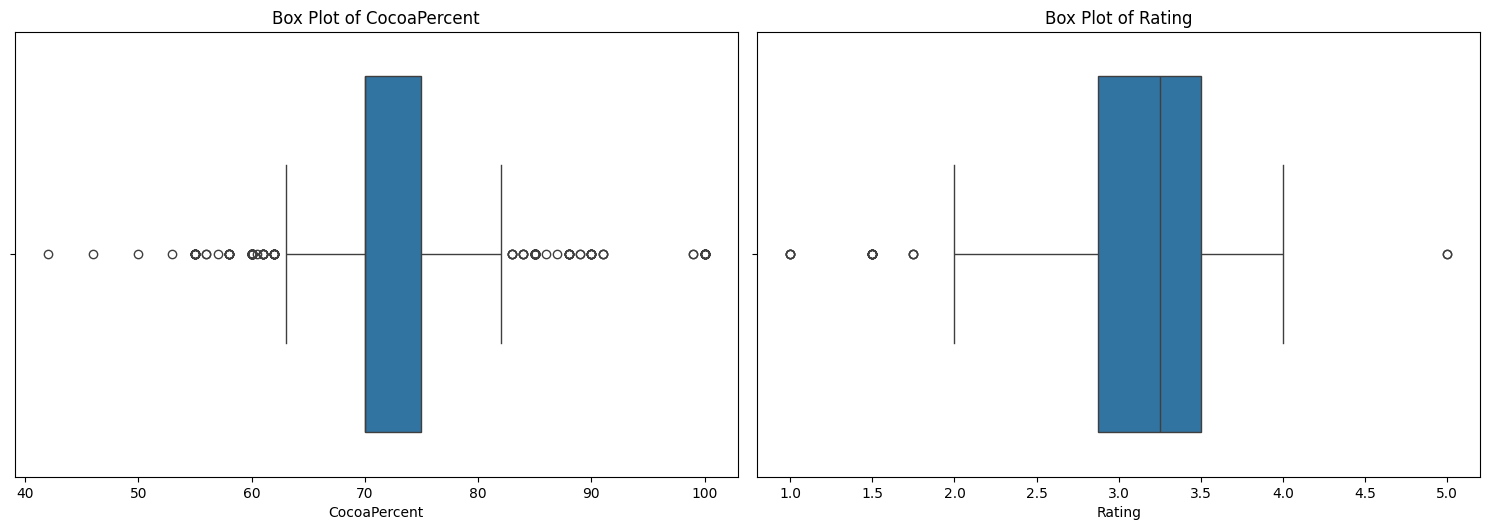

In [533]:
# Удаляем символ '%' и преобразуем столбец CocoaPercent в числовой формат
df['CocoaPercent'] = df['CocoaPercent'].str.replace('%', '').astype(float)

# Выбираем столбцы для анализа
columns_to_check = ['CocoaPercent', 'Rating']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Можно заметить, что оба столбца содержат выбросы, однако их значительно больше в столбце CocoaPercent. Кроме того, экстремальные значения здесь могут быть редкими экспериментальными продуктами и не отражать массовый рынок, а значит искажать статические модели и предсказания. С другой стороны, у столбца Rating выбросы несут информацию о таких крайних случаях, как исключительное качество продукта или совсем неудачный продукт. Такие данные могут быть ценны, особенно если целью является определение лучших и худших образцов для создания маркетинговых стратегий. Значит имеет смысл очистить от выбросов только столбец CocoaPercent.

### Очищаем CocoaPercent от выбросов

Количество удаленных строк: 186


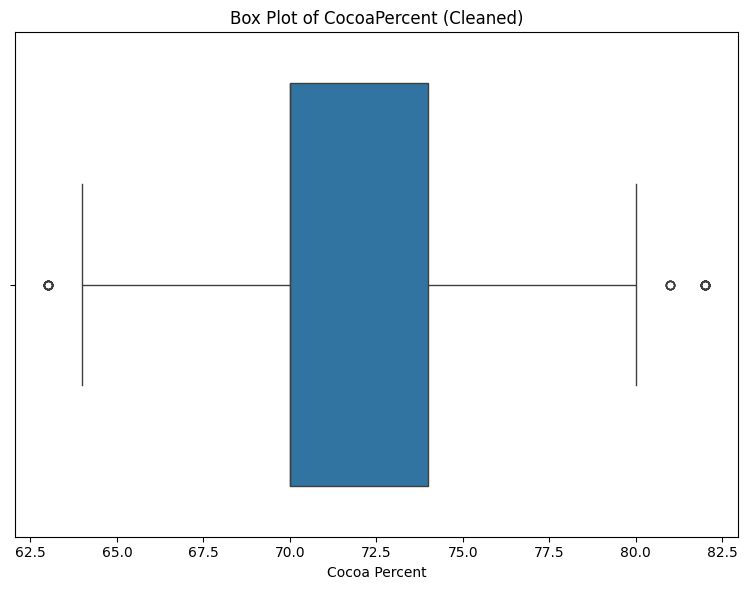

In [534]:
# Выбираем столбцы для очистки
columns_to_clean = ['CocoaPercent']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Диаграмма размаха для CocoaPercent
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['CocoaPercent'])
plt.title('Box Plot of CocoaPercent (Cleaned)')
plt.xlabel('Cocoa Percent')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv("..//..//static//csv//flavors_of_cacao_cleaned.csv", index=False)
df = df_cleaned

Видно, что выбросов практически не осталось.

### Теперь проверим на пустые значения

In [535]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Company (Maker-if known)           0
Specific Bean Originor Bar Name    0
REF                                0
ReviewDate                         0
CocoaPercent                       0
CompanyLocation                    0
Rating                             0
BeanType                           1
Broad BeanOrigin                   1
dtype: int64

Company (Maker-if known)           False
Specific Bean Originor Bar Name    False
REF                                False
ReviewDate                         False
CocoaPercent                       False
CompanyLocation                    False
Rating                             False
BeanType                            True
Broad BeanOrigin                    True
dtype: bool

BeanType процент пустых значений: %0.06
Broad BeanOrigin процент пустых значений: %0.06


В датасете имеется пара пустых значений. Удалим их.

In [536]:
# Удаление пропущенных значений в столбцах BeanType и Broad BeanOrigin
df = df.dropna(subset=['BeanType', 'Broad BeanOrigin'])

# Проверка на пропущенные значения после удаления
missing_values_after_drop = df.isnull().sum()

# Вывод результатов после удаления
print("\nКоличество пустых значений в каждом столбце после удаления:")
print(missing_values_after_drop)


Количество пустых значений в каждом столбце после удаления:
Company (Maker-if known)           0
Specific Bean Originor Bar Name    0
REF                                0
ReviewDate                         0
CocoaPercent                       0
CompanyLocation                    0
Rating                             0
BeanType                           0
Broad BeanOrigin                   0
dtype: int64


Пустых значений в датасете теперь нет.

### Можно перейти к созданию выборок

In [537]:
# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что Rating - это целевая переменная
X = df.drop('Rating', axis=1)
y = df['Rating']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (964, 8)
Размер контрольной выборки: (321, 8)
Размер тестовой выборки: (322, 8)


In [538]:
# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
Rating
3.50    0.242739
3.00    0.199170
3.25    0.155602
2.75    0.137967
3.75    0.125519
2.50    0.062241
4.00    0.050830
2.00    0.012448
2.25    0.007261
5.00    0.002075
1.50    0.002075
1.75    0.001037
1.00    0.001037
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
Rating
3.50    0.211838
3.00    0.168224
3.25    0.165109
2.75    0.137072
3.75    0.127726
2.50    0.074766
4.00    0.074766
2.00    0.021807
2.25    0.009346
1.50    0.006231
1.00    0.003115
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Rating
3.25    0.211180
3.50    0.198758
3.00    0.164596
2.75    0.145963
3.75    0.136646
4.00    0.068323
2.50    0.062112
2.00    0.006211
1.00    0.003106
2.25    0.003106
Name: proportion, dtype: float64


Выборки несбалансированны в частности из-за того, что некоторые классы занимают крайне малую долю в данных. При необходимости получить сбалансированный набор можно использовать специальные методы, к примеру oversampling и undersampling. Но в данном случае просто так их использовать не получится, потому что задача модели состоит в том, чтобы предсказать числовые (регрессионые) значения, а большинство реализаций в таком случае применить не получится. К тому же в Rating мало уникальных значений, что вызовет проблемы при использовании методов, предназначенных для регрессии (таких как к примеру SMOGN). Поэтому здесь применение таких методов не является целесообразным.




## Датасет №2 (качество воды) 

Ссылка: https://www.kaggle.com/datasets/adityakadiwal/water-potability

Проблемная область: качество питьевой воды и факторы, влияющие на ее безопасность для здоровья.

Объекты наблюдения: водоемы, содержащие воду разного качества.

In [539]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# вывод всех столбцов
df = pd.read_csv("..//..//static//csv//water_potability.csv")
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


Атрибуты: 
* ph – параметр для оценки кислотно-щелочного баланса воды;
* Hardness – жесткость воды, определяемая содержанием кальция и магния;
* Solids – общее количество растворенных веществ, указывающее на минерализацию воды;
* Chloramines – концентрация хлора и хлораминов, использующихся для дезинфекции воды;
* Sulfate – содержание сульфатов, присутствующих в воде;
* Conductivity – электропроводность воды, измеряющая уровень ионов в растворе;
* Organic_carbon – уровень органического углерода, происходящего из разлагающихся органических веществ;
* Trihalomethanes –  концентрация трихалометанов, образующихся при обработке хлором;
* Turbidity – мутность воды, указывающая на количество взвешенных твердых частиц;
* Potability – показатель пригодности воды для питья (1 – пригодна, 0 – непригодна).

Примеры бизнес целей и целей технического проекта:
1. Совершенствование систем очистки воды.
    * Бизнес-цель: разработка и внедрение инновационных технологий очистки воды, чтобы уменьшить расходы на водоочистные сооружения и повысить их эффективность.
    * Цель технического проекта: проектирование и тестирование новых фильтров и процессов очистки на основе данных о загрязнении воды.
2. Интеграция данных для управления водными ресурсами.
    * Бизнес-цель: объединение данных о водных ресурсах для комплексного анализа и управления, что позволит более эффективно распределять ресурсы.
    * Цель технического проекта: разработка платформы для интеграции данных с различных датчиков и источников информации, использующей машинное обучение для прогнозирования изменений качества воды.
3. Повышение осведомленности о качестве воды.
    * Бизнес-цель: информирование населения о состоянии водоемов и возможных рисках для здоровья.
    * Цель технического проекта: разработка платформы для публичного доступа к данным о качестве воды.

Входные данные и целевой признак могут быть следующими:
1. Входные данные:
    * pH значение;
    * Жесткость воды;
    * Общее количество растворенных веществ;
    * Концентрация хлора и хлораминов;
    * Содержание сульфатов;
    * Электропроводность;
    * Уровень органического углерода;
    * Концентрация трихалометанов;
    * Мутность воды.
2. Целевой признак:
    * Пригодность воды для питья.

Актуальность: анализ качества питьевой воды и факторов, влияющих на ее безопасность, играет очень важную роль в охране здоровья населения. Так мониторинг факторов, влияющих на качество воды, позволит предотвращать вспышки заболеваний и способствовать повышению уровня жизни.

### Проверяем на выбросы

Количество выбросов в столбце 'Hardness': 83
Количество выбросов в столбце 'Solids': 47
Количество выбросов в столбце 'Organic_carbon': 25


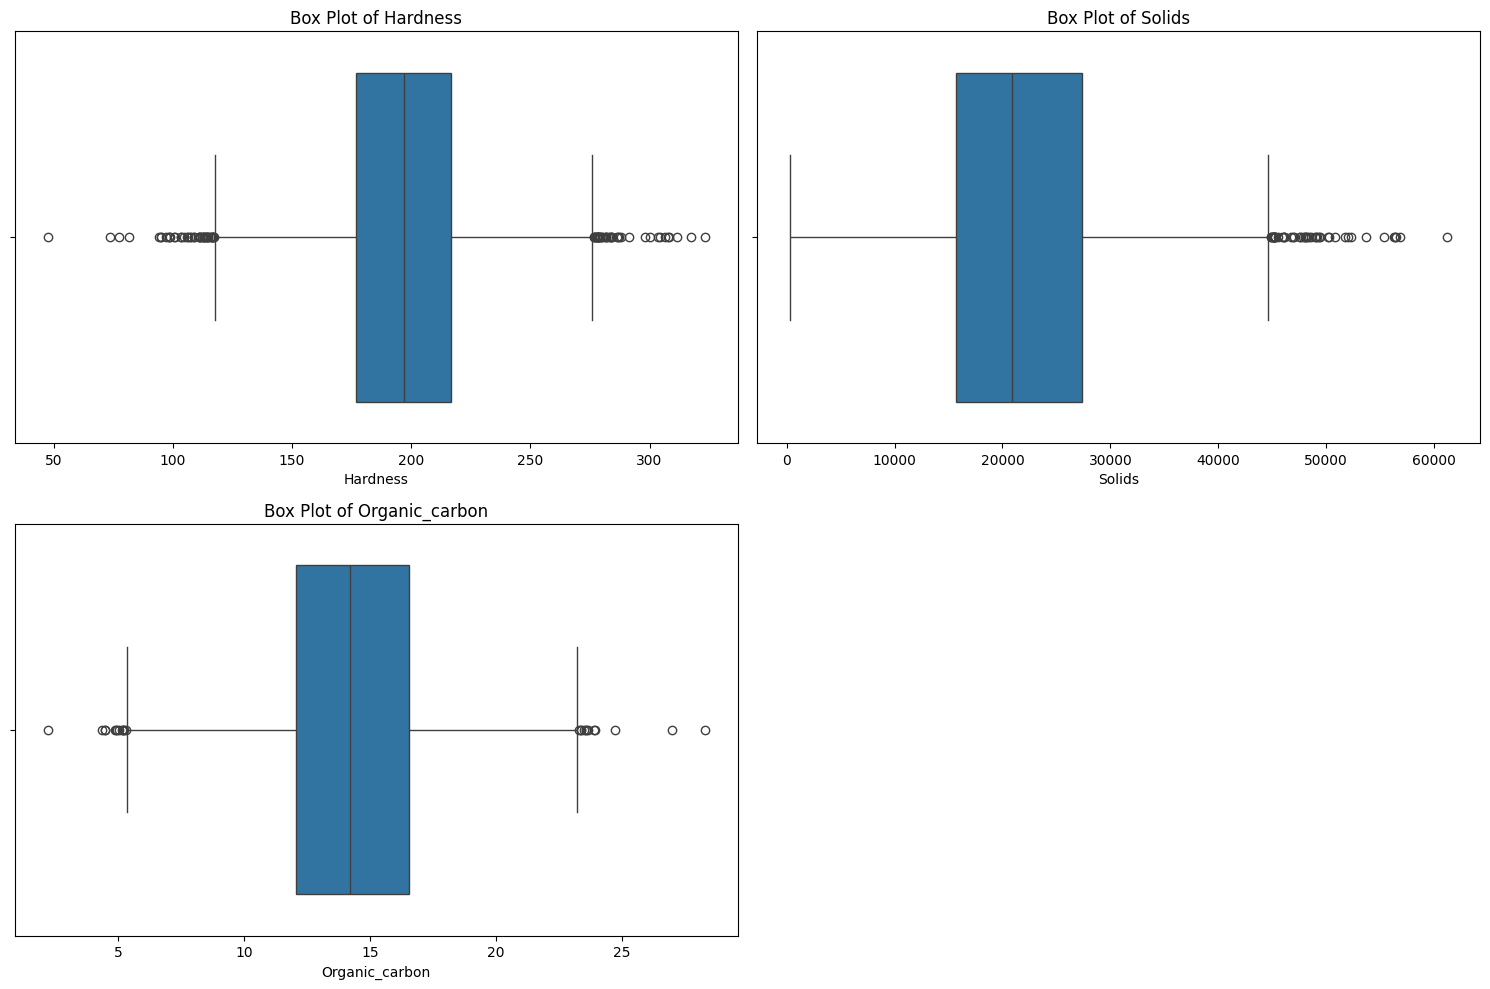

In [540]:
# Выбираем столбцы для анализа
columns_to_check = ['Hardness', 'Solids', 'Organic_carbon']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

В каждом из выбранных столбцов присутствуют выбросы. Очистим их.

Количество удаленных строк: 145


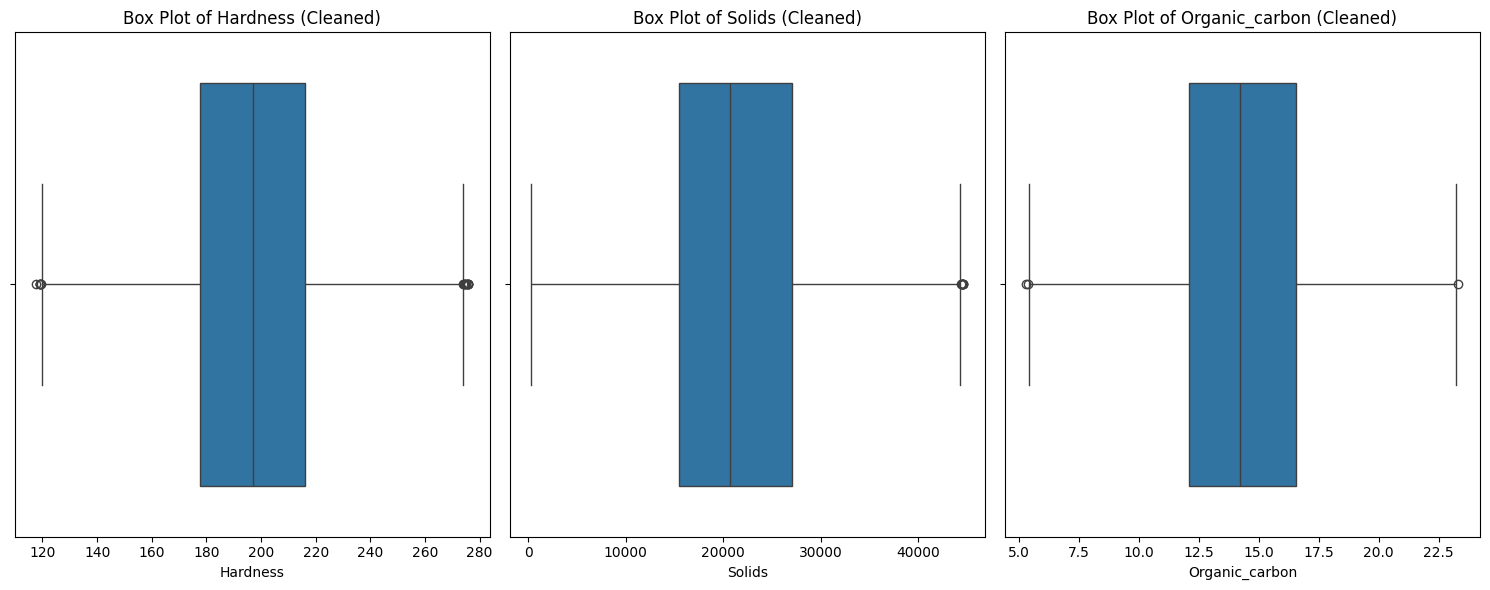

In [541]:
# Выбираем столбцы для очистки
columns_to_clean = ['Hardness', 'Solids', 'Organic_carbon']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Диаграмма размаха для Hardness
plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned['Hardness'])
plt.title('Box Plot of Hardness (Cleaned)')
plt.xlabel('Hardness')

# Диаграмма размаха для Solids
plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['Solids'])
plt.title('Box Plot of Solids (Cleaned)')
plt.xlabel('Solids')

# Диаграмма размаха для Organic_carbon
plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned['Organic_carbon'])
plt.title('Box Plot of Organic_carbon (Cleaned)')
plt.xlabel('Organic_carbon')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv("..//..//static//csv//water_potability_cleaned.csv", index=False)
df = df_cleaned

Количество выбросов уменьшилось.

### Теперь проверим на пустые значения

In [542]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

ph                 466
Hardness             0
Solids               0
Chloramines          0
Sulfate            746
Conductivity         0
Organic_carbon       0
Trihalomethanes    154
Turbidity            0
Potability           0
dtype: int64

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

ph процент пустых значений: %14.88
Sulfate процент пустых значений: %23.83
Trihalomethanes процент пустых значений: %4.92


В трех столбцах встречается большое число пустых значений. Поэтому вместо удаления заменим их значения на медиану.

In [543]:
# Замена значений
df["ph"] = df["ph"].fillna(df["ph"].median())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].median())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].median())

# Проверка на пропущенные значения после замены
missing_values_after_drop = df.isnull().sum()

# Вывод результатов после замены
print("\nКоличество пустых значений в каждом столбце после замены:")
print(missing_values_after_drop)


Количество пустых значений в каждом столбце после замены:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Пустых значений в датасете теперь нет.

### Можно перейти к созданию выборок

In [544]:
# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что Potability - это целевая переменная
X = df.drop('Potability', axis=1)
y = df['Potability']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1878, 9)
Размер контрольной выборки: (626, 9)
Размер тестовой выборки: (627, 9)


In [545]:
# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
Potability
0    0.613951
1    0.386049
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
Potability
0    0.616613
1    0.383387
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Potability
0    0.614035
1    0.385965
Name: proportion, dtype: float64


Такие выборки сложно назвать сбалансированными. Сделаем приращение данных методом выборки с избытком (oversampling)

In [546]:
smote = SMOTE(random_state=42)

# Применение SMOTE для балансировки обучающей выборки
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Проверка сбалансированности после SMOTE
print("Сбалансированность обучающей выборки после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Сбалансированность обучающей выборки после SMOTE:
Potability
1    0.5
0    0.5
Name: proportion, dtype: float64


Можно увидеть, что выборка была успешно сбалансирована.


## Датасет №3 (данные о диабете) 

Ссылка: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

Проблемная область: диагностика диабета и выявление факторов, влияющих на риск его возникновения.

Объекты наблюдения: женщины в возрасте от 21 года из группы индейцев племени Пима.

In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# вывод всех столбцов
df = pd.read_csv("..//..//static//csv//diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Атрибуты: 
* Pregnancies – количество беременностей у пациентки;
* Glucose – уровень глюкозы в крови;
* BloodPressure – артериальное давление;
* SkinThickness – толщина кожи;
* Insulin – уровень инсулина в крови;
* BMI – индекс массы тела (Body Mass Index);
* DiabetesPedigreeFunction – вероятность наследственной предрасположенности к диабету;
* Age –  возраст пациентки;
* Outcome – признак, показывающий, диагностирован ли диабет (1 – да, 0 – нет).

Примеры бизнес целей и целей технического проекта:
1. Разработка программ ранней диагностики диабета.
    * Бизнес-цель: создание системы раннего выявления пациентов с высоким риском диабета для снижения затрат на лечение и улучшения прогноза.
    * Цель технического проекта: создание алгоритмов машинного обучения для предсказания вероятности заболевания на основе медицинских данных.
2. Оптимизация медицинского мониторинга пациентов.
    * Бизнес-цель: эффективное распределение ресурсов здравоохранения за счет фокусирования на группах риска.
    * Цель технического проекта: разработка платформы для интеграции медицинских данных, которая позволит отслеживать ключевые показатели здоровья и предсказывать осложнения.
3. Повышение осведомленности о факторах риска диабета среди населения.
    * Бизнес-цель: внедрение образовательных кампаний, направленных на изменение образа жизни с целью профилактики диабета.
    * Цель технического проекта: создание системы оповещения пациентов с рекомендациями на основе их медицинских показателей.

Входные данные и целевой признак могут быть следующими:
1. Входные данные:
    * количество беременностей;
    * уровень глюкозы в крови;
    * артериальное давление;
    * толщина кожи;
    * уровень инсулина в крови;
    * индекс массы тела;
    * вероятность наследственной предрасположенности к диабету;
    * возраст.
2. Целевой признак:
    * Диагностика диабета (1 – да, 0 – нет).

Актуальность: анализ медицинских данных для ранней диагностики диабета играет ключевую роль в профилактике этого заболевания и управлении им. Выявление факторов риска позволяет принимать превентивные меры, снижая вероятность осложнений и улучшая качество жизни пациентов.

### Проверяем на выбросы

Количество выбросов в столбце 'Age': 9
Количество выбросов в столбце 'BloodPressure': 45
Количество выбросов в столбце 'BMI': 19


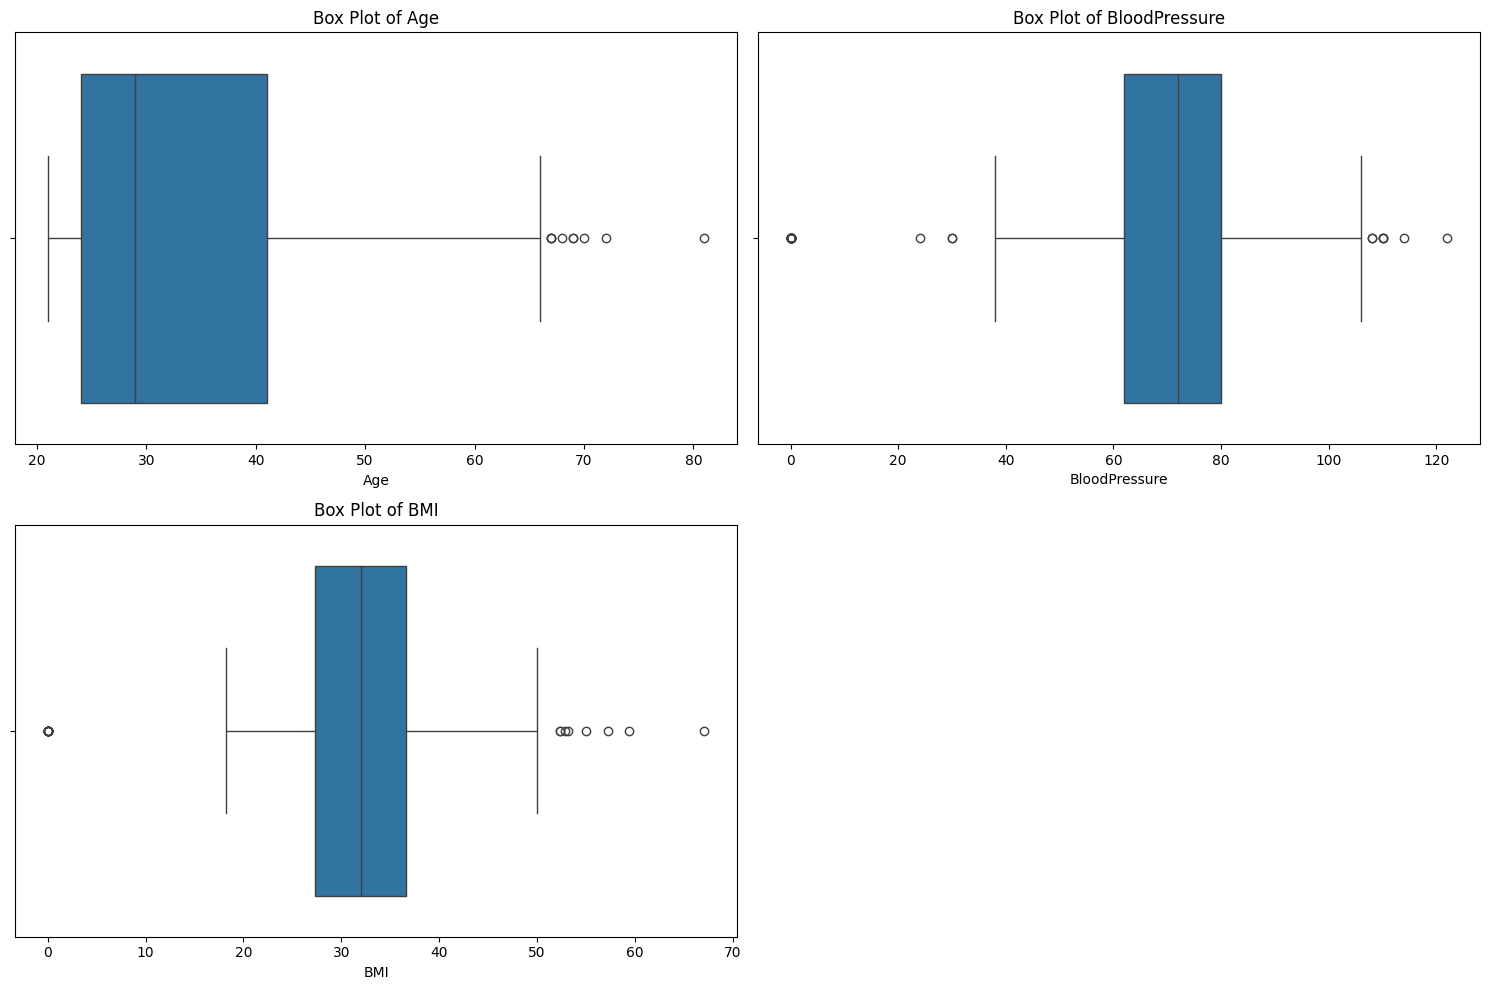

In [548]:
# Выбираем столбцы для анализа
columns_to_check = ['Age', 'BloodPressure', 'BMI']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем диаграммы размахов
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

В каждом из выбранных столбцов присутствуют выбросы. Очистим их.

Количество удаленных строк: 61


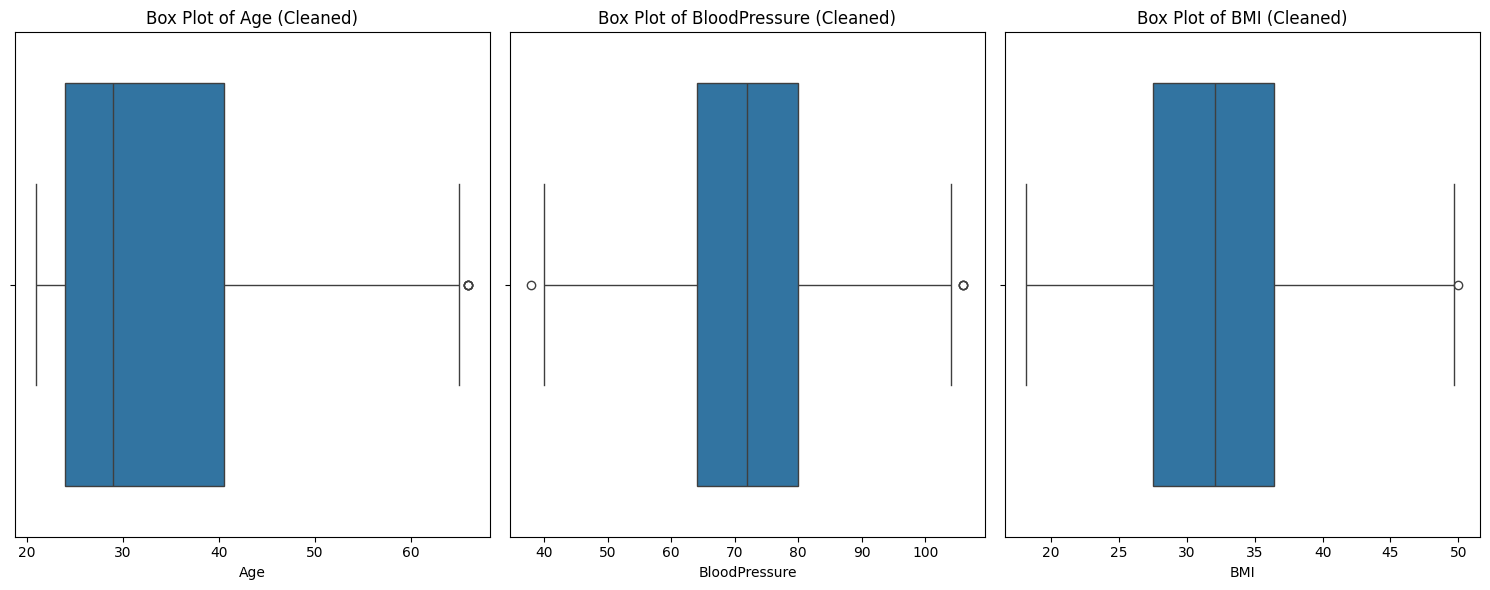

In [549]:
# Выбираем столбцы для очистки
columns_to_clean = ['Age', 'BloodPressure', 'BMI']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем диаграммы размаха для очищенных данных
plt.figure(figsize=(15, 6))

# Диаграмма размаха для Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned['Age'])
plt.title('Box Plot of Age (Cleaned)')
plt.xlabel('Age')

# Диаграмма размаха для BloodPressure
plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['BloodPressure'])
plt.title('Box Plot of BloodPressure (Cleaned)')
plt.xlabel('BloodPressure')

# Диаграмма размаха для BMI
plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned['BMI'])
plt.title('Box Plot of BMI (Cleaned)')
plt.xlabel('BMI')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv("..//..//static//csv//diabetes_cleaned.csv", index=False)
df = df_cleaned

Количество выбросов уменьшилось.

### Теперь проверим на пустые значения

In [550]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool



Пустых значений в датасете нет. 

### Можно перейти к созданию выборок

In [551]:
# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что Outcome - это целевая переменная
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (424, 8)
Размер контрольной выборки: (141, 8)
Размер тестовой выборки: (142, 8)


In [552]:
# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
Outcome
0    0.658019
1    0.341981
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
Outcome
0    0.680851
1    0.319149
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Outcome
0    0.640845
1    0.359155
Name: proportion, dtype: float64


Такие выборки сложно назвать сбалансированными. В этот раз используем метод выборки с недостатком (undersampling).

In [553]:
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

print("Сбалансированность обучающей выборки после undersampling:")
print(y_train_resampled.value_counts(normalize=True))

Сбалансированность обучающей выборки после undersampling:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64


Можно увидеть, что выборка была успешно сбалансирована.